# Sourcing & Analyzing Time-Series Data

### Importing data & libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path import

path = r'C:\Users\guzic\Contacts\Baseball Analysis'

In [4]:
# dataset import

bb = pd.read_csv(os.path.join(path, '02 Data', 'Prepped Data', 'CLEANED Baseball Hitter.csv'), index_col = False)

In [5]:
bb.shape

(119060, 27)

In [6]:
bb.head()

,Unnamed: 0,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,...,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name,Runs Range
0,0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,...,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team,High Runs
1,1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,...,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team,High Runs
2,2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,...,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team,High Runs
3,3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,...,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team,High Runs
4,4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,...,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team,High Runs


In [7]:
# dropping Unnamed: columns

bb = bb.drop(columns = 'Unnamed: 0')

In [8]:
bb.head()

,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,Runs,...,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name,Runs Range
0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,58.0,...,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team,High Runs
1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,105.0,...,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team,High Runs
2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,106.0,...,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team,High Runs
3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,118.0,...,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team,High Runs
4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,109.0,...,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team,High Runs


In [9]:
# check

bb.columns

Index(['name', 'url', 'Year', 'Age', 'Team', 'League', 'Games',
       'Plate Appearances', 'At Bats', 'Runs', 'Hits', 'Double', 'Triple',
       'Home Run', 'Runs Batted In', 'Walk', 'Batting Average',
       'On Base Percentage', 'Slugging Percentage', 'On Base Plus Slugging',
       'Total Bases', 'Pos', 'Awards', 'team_city_code', 'state_name',
       'Runs Range'],
      dtype='object')

In [56]:
# creating subset for analysis of Years & Runs No need to filter years, etc. as the data is complete and does not have future data.

bb1 = bb[['Year', 'Runs']]

In [57]:
bb1.head()

,Year,Runs
0,1954,58.0
1,1955,105.0
2,1956,106.0
3,1957,118.0
4,1958,109.0


#### Curious to see if the amount of Runs has changed over time

#### Would also like to check Home Runs

#### Coverting Year to int32

In [58]:
bb1['Year'] = bb1['Year'].astype('int32')

In [59]:
bb1.dtypes

Year      int32
Runs    float64
dtype: object

In [60]:
# Changing year to Datetime

In [61]:
bb1['Year'] = pd.to_datetime(bb1.Year, format = '%Y')

In [62]:
# check 
bb1.dtypes

Year    datetime64[ns]
Runs           float64
dtype: object

#### Let's filter the years to the last 30 years only. Let's exclude 2020 since a lot of games were canceled due to Covid, etc.

In [63]:
bb1_sub = bb1.loc[(bb1['Year'] >= '1989-01-01') & (bb1['Year'] < '2019-01-01')]

In [64]:
# check

bb1_sub.head()

,Year,Runs
23,1992-01-01,81.0
24,1993-01-01,62.0
25,1994-01-01,61.0
26,1995-01-01,72.0
27,1996-01-01,86.0


In [65]:
# Set the "Year" column as a new datetime column

bb1_sub['datetime'] = bb1_sub['Year']

In [66]:
bb1_sub.head()

,Year,Runs,datetime
23,1992-01-01,81.0,1992-01-01
24,1993-01-01,62.0,1993-01-01
25,1994-01-01,61.0,1994-01-01
26,1995-01-01,72.0,1995-01-01
27,1996-01-01,86.0,1996-01-01


In [67]:
# Reset index so that you can use the "datetime" column as a filter

bb1_sub = bb1_sub.reset_index()

In [68]:
bb1_sub

,index,Year,Runs,datetime
0,23,1992-01-01,81.0,1992-01-01
1,24,1993-01-01,62.0,1993-01-01
2,25,1994-01-01,61.0,1994-01-01
3,26,1995-01-01,72.0,1995-01-01
4,27,1996-01-01,86.0,1996-01-01
...,...,...,...,...
47582,119027,1996-01-01,13.0,1996-01-01
47583,119052,1989-01-01,61.0,1989-01-01
47584,119053,1989-01-01,10.0,1989-01-01
47585,119054,1990-01-01,47.0,1990-01-01


In [69]:
bb1_sub = bb1_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

In [70]:
bb1_sub.head()

,index,Year,Runs
datetime,,,
1992-01-01,23,1992-01-01,81.0
1993-01-01,24,1993-01-01,62.0
1994-01-01,25,1994-01-01,61.0
1995-01-01,26,1995-01-01,72.0
1996-01-01,27,1996-01-01,86.0


In [71]:
# dropping index & year columns

In [72]:
bb1_sub.drop(['index'], axis=1, inplace=True) # Drop the "Index" column.

In [73]:
bb1_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.

In [74]:
bb1_sub.head()

,Runs
datetime,
1992-01-01,81.0
1993-01-01,62.0
1994-01-01,61.0
1995-01-01,72.0
1996-01-01,86.0


In [75]:
type(bb1_sub)

pandas.core.frame.DataFrame

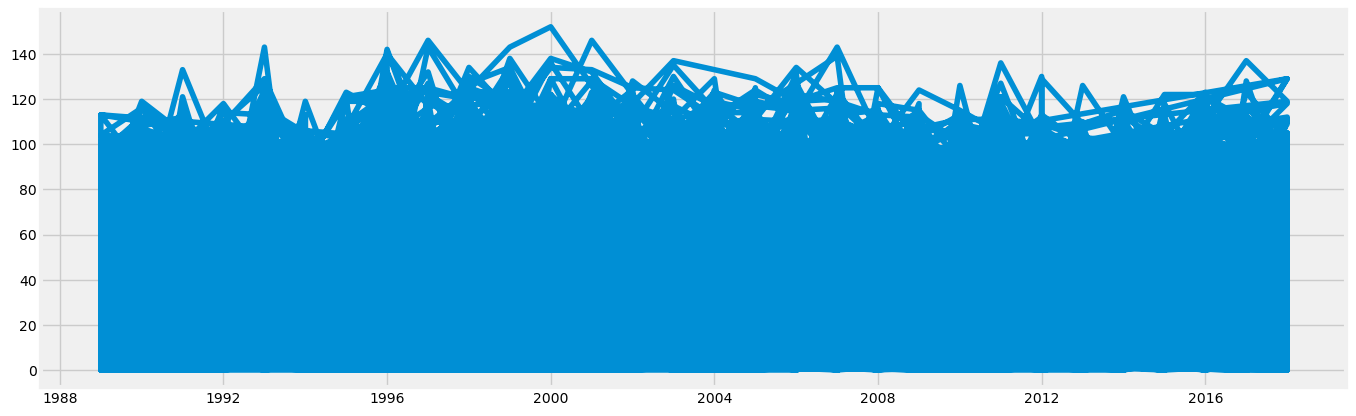

In [76]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(bb1_sub)

### Time-series analysis: decomposition

##### No matter what I do, I cannot get the decomposition charts to run... Any idea what I am doing wrong?

In [77]:
groupbyDF = bb1_sub.groupby('datetime').mean()

In [80]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(groupbyDF['Runs'], model='additive')

In [81]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

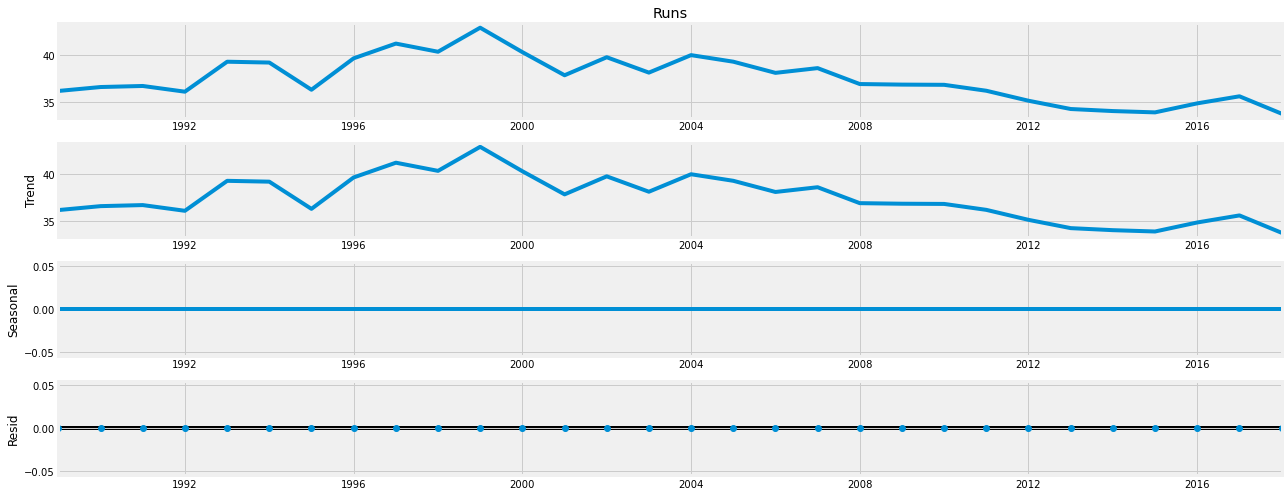

In [82]:
# Plot the separate components

decomposition.plot()
plt.show()

### Testing for stationarity

#### Disprove the null = no unit root = stationary data = can proceed with forecast

In [83]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(bb1_sub['Runs'])

Dickey-Fuller Stationarity test:
Test Statistic                   -20.446970
p-value                            0.000000
Number of Lags Used               57.000000
Number of Observations Used    47529.000000
Critical Value (1%)               -3.430488
Critical Value (5%)               -2.861601
Critical Value (10%)              -2.566802
dtype: float64


### The t-statistic is -20 which is much smaller that the critical value of -2.8. This means that we can reject the null hypothesis.

#### Test statistic larger than critical value = can’t reject null hypothesis
#### Test statistic smaller than critical value = can reject null hypothesis

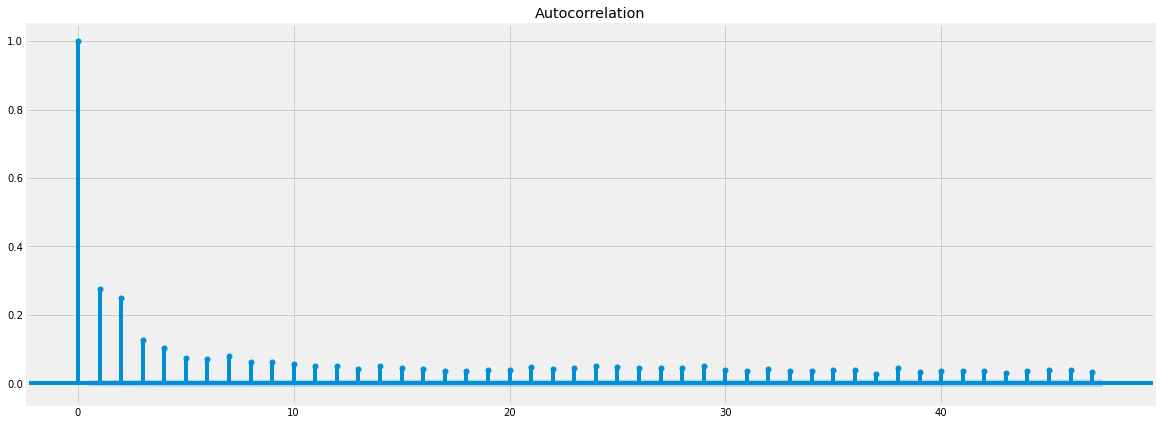

In [84]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(bb1_sub)
plt.show()

### Stationarizing the Baseball Data

In [85]:
data_diff = bb1_sub - bb1_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [86]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [87]:
data_diff.head()

,Runs
datetime,
1993-01-01,-19.0
1994-01-01,-1.0
1995-01-01,11.0
1996-01-01,14.0
1996-01-01,-85.0


In [88]:
data_diff.columns

Index(['Runs'], dtype='object')

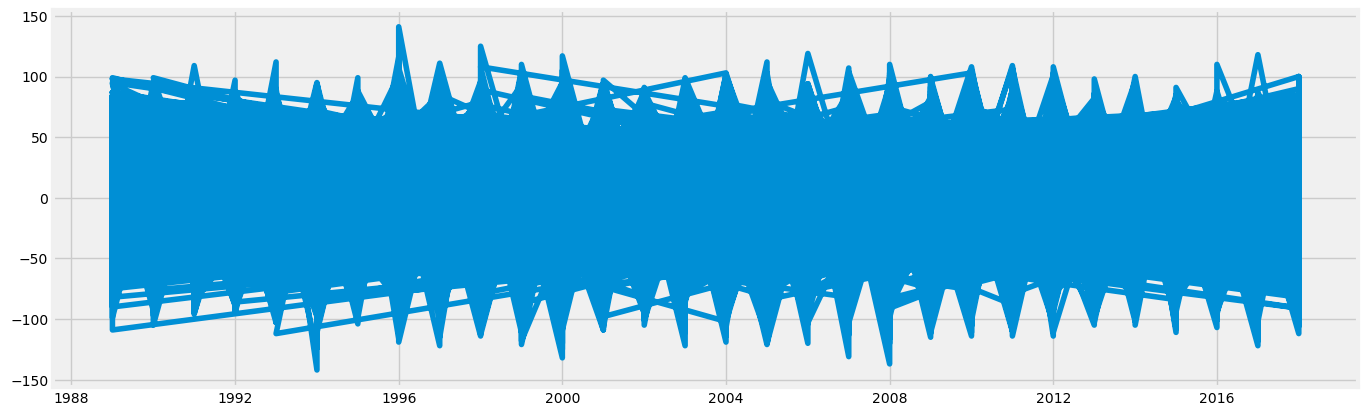

In [89]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [90]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -47.946076
p-value                            0.000000
Number of Lags Used               57.000000
Number of Observations Used    47528.000000
Critical Value (1%)               -3.430488
Critical Value (5%)               -2.861601
Critical Value (10%)              -2.566802
dtype: float64


### The t-statistic is -47 which is much smaller that the critical value of -2.8. This means that we can reject the null hypothesis.

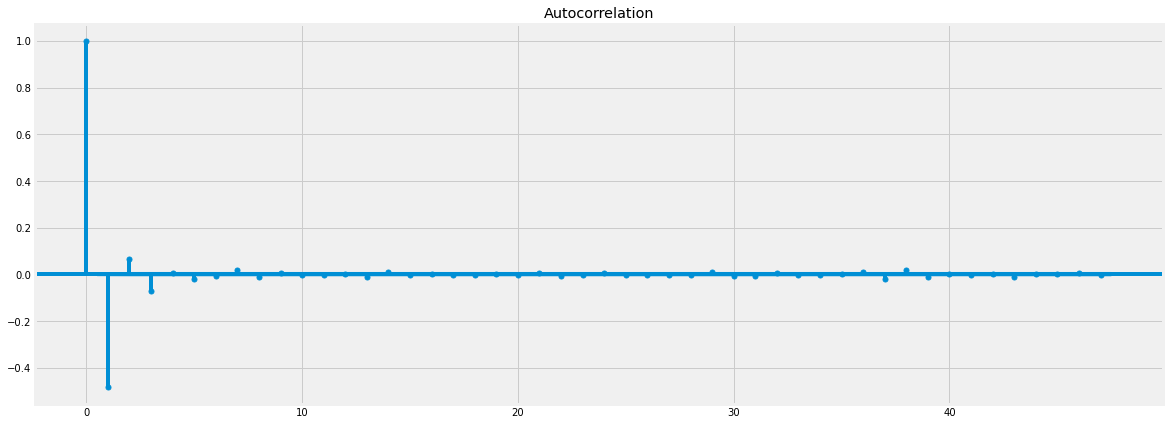

In [91]:
plot_acf(data_diff)
plt.show()

# datetime & Home Runs

In [92]:
# creating subset for analysis of Years & Home Runs

bb5 = bb[['Year', 'Home Run']]

In [93]:
bb5.head()

,Year,Home Run
0,1954,13.0
1,1955,27.0
2,1956,26.0
3,1957,44.0
4,1958,30.0


In [94]:
bb5.dtypes

Year          int64
Home Run    float64
dtype: object

#### Coverting Year to int32

In [95]:
bb5['Year'] = bb5['Year'].astype('int32')

In [96]:
bb5.dtypes

Year          int32
Home Run    float64
dtype: object

In [97]:
# Changing year to Datetime

In [98]:
bb5['Year'] = pd.to_datetime(bb1.Year, format = '%Y')

In [99]:
bb5.head()

,Year,Home Run
0,1954-01-01,13.0
1,1955-01-01,27.0
2,1956-01-01,26.0
3,1957-01-01,44.0
4,1958-01-01,30.0


In [100]:
# check 
bb5.dtypes

Year        datetime64[ns]
Home Run           float64
dtype: object

#### Let's filter the years to the last 30 years only. Let's exclude 2020 since a lot of games were canceled due to Covid, etc.

In [101]:
bb5_sub = bb5.loc[(bb5['Year'] >= '1989-01-01') & (bb5['Year'] < '2019-01-01')]

In [102]:
# check

bb5_sub.head()

,Year,Home Run
23,1992-01-01,8.0
24,1993-01-01,5.0
25,1994-01-01,16.0
26,1995-01-01,10.0
27,1996-01-01,13.0


In [103]:
# Set the "Year" column as the index & creating it as datetime

bb5_sub['datetime'] = bb5_sub['Year']

In [104]:
bb5_sub = bb5_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

In [105]:
bb5_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.

In [106]:
bb5_sub.head()

,Home Run
datetime,
1992-01-01,8.0
1993-01-01,5.0
1994-01-01,16.0
1995-01-01,10.0
1996-01-01,13.0


In [107]:
type(bb5_sub)

pandas.core.frame.DataFrame

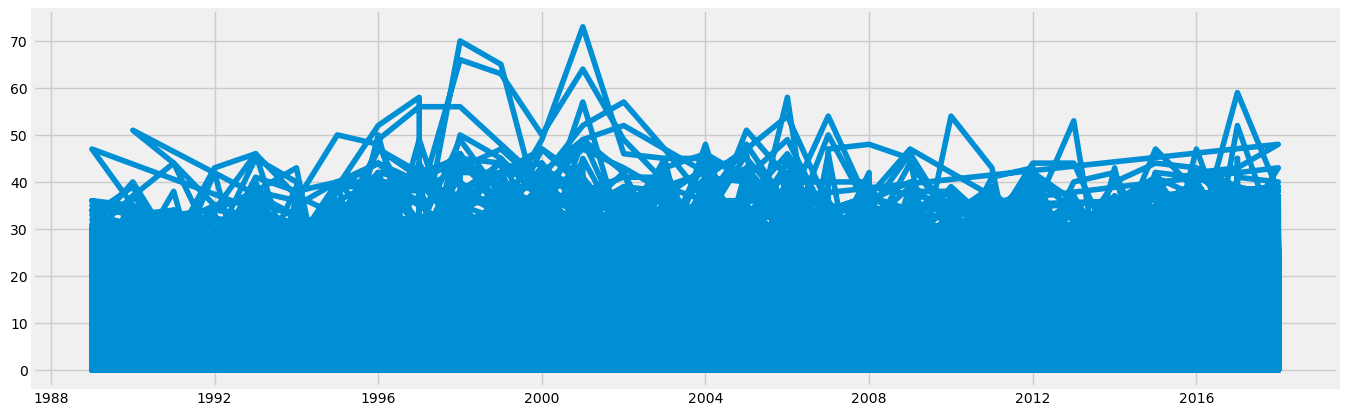

In [108]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(bb5_sub)

### Time-series analysis: decomposition

In [109]:
groupbyDF2 = bb5_sub.groupby('datetime').mean()

In [110]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(groupbyDF2, model='additive')

In [111]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

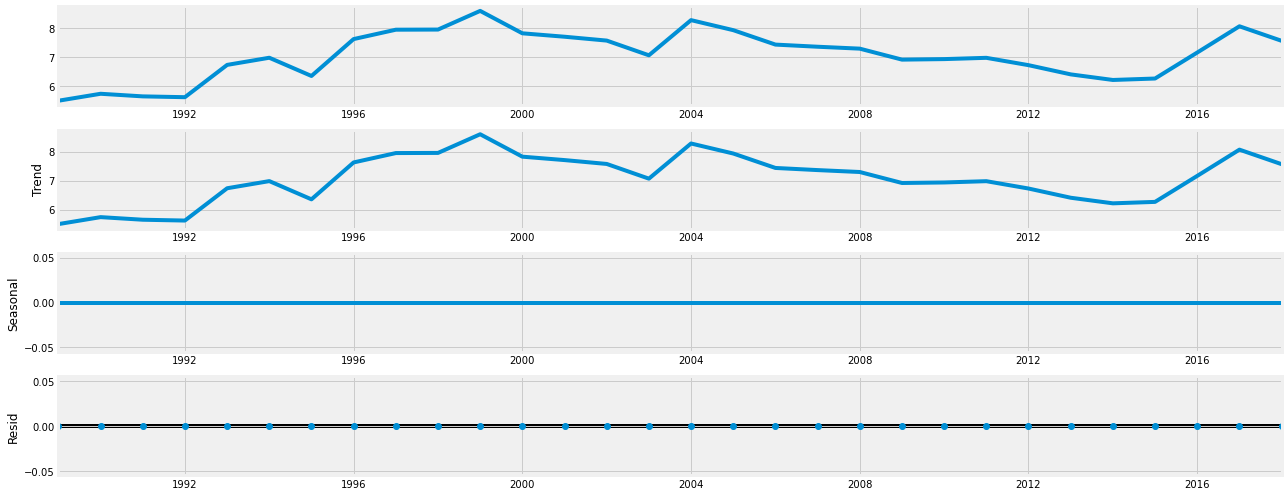

In [112]:
# Plot the separate components

decomposition2.plot()
plt.show()

### Testing for stationarity

#### Disprove the null = no unit root = stationary data = can proceed with forecast

In [113]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(bb5_sub['Home Run'])

Dickey-Fuller Stationarity test:
Test Statistic                   -21.613467
p-value                            0.000000
Number of Lags Used               50.000000
Number of Observations Used    47536.000000
Critical Value (1%)               -3.430488
Critical Value (5%)               -2.861601
Critical Value (10%)              -2.566802
dtype: float64


### The t-statistic is -21 which is much smaller that the critical value of -2.8. This means that we can reject the null hypothesis.

#### Test statistic larger than critical value = can’t reject null hypothesis
#### Test statistic smaller than critical value = can reject null hypothesis

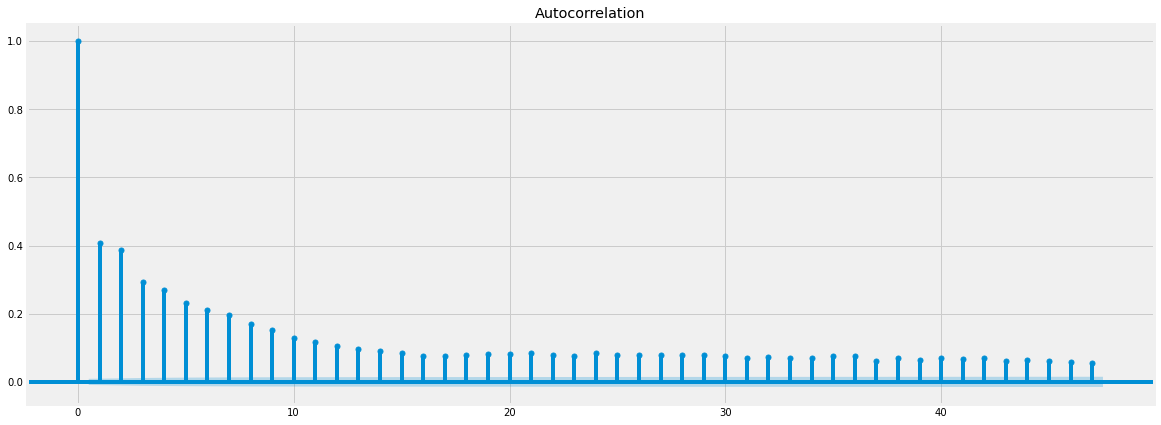

In [114]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(bb5_sub)
plt.show()

### Stationarizing the Federal Reserve Baseball Data

In [115]:
data_diff2 = bb5_sub - bb5_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [116]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [117]:
data_diff2.head()

,Home Run
datetime,
1993-01-01,-3.0
1994-01-01,11.0
1995-01-01,-6.0
1996-01-01,3.0
1996-01-01,-13.0


In [118]:
data_diff2.columns

Index(['Home Run'], dtype='object')

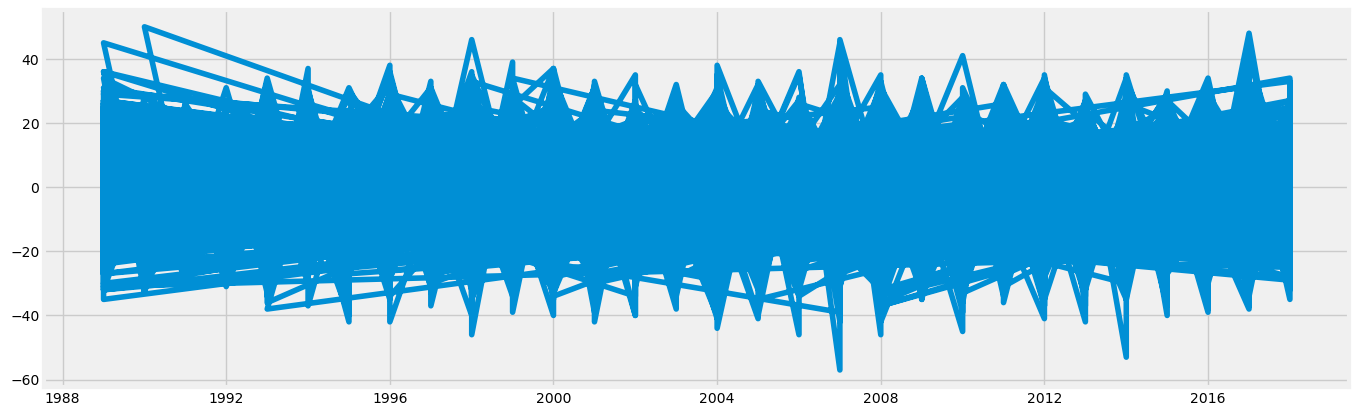

In [119]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [120]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                   -45.744965
p-value                            0.000000
Number of Lags Used               57.000000
Number of Observations Used    47528.000000
Critical Value (1%)               -3.430488
Critical Value (5%)               -2.861601
Critical Value (10%)              -2.566802
dtype: float64


### The t-statistic is -45 which is much smaller that the critical value of -2.8. This means that we can reject the null hypothesis.

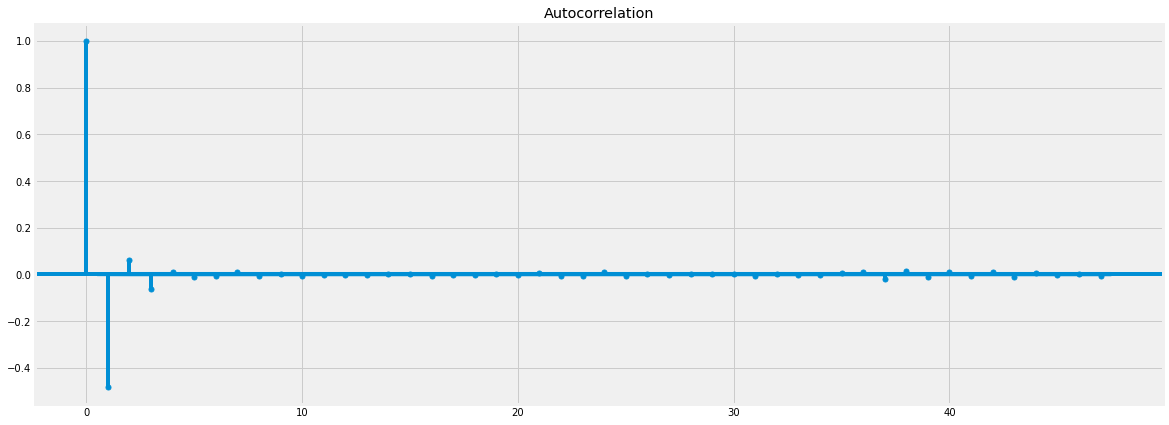

In [121]:
plot_acf(data_diff2)
plt.show()